![](http://i67.tinypic.com/2jcbwcw.png)


## Classification BKHW

Author List: 

Sana Iqbal, significant edits for fall 2017

Kevin Li, Ikhlaq Sidhu, Spring 2017

Original Sources: http://scikit-learn.org,http://archive.ics.uci.edu/ml/datasets/Iris
License: Feel free to do whatever you want to with this code


### Our  predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __ default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


* __TO GET STARTED:__:

We will use python library -SCIKIT-LEARN for our classification and regression models.

1. Install numpy, scipy, scikit-learn.

2. Download the dataset provided and save it in your current working directory.

3. In the following sections  you will:

    3.1 Read the dataset into the python program.
    
    3.2 Look  into the dataset characteristics, check for feature type - categorical or numerical.
    
    3.3 Find feature distributions to check sufficiency of data.
    
    3.4 Divide the dataset into training and validation subsets.
    
    3.5 Fit models with training data  using scikit-learn library.
    
    3.6 Calculate training error,this gives you the idea of bias in your model.
    
    3.7 Test model prediction accuracy using validation data,this gives you bias and variance error in the model.
    
    3.8 Report model performance on validation data using different metrics.
    
    3.9 Save the model parameters in a pickle file so that it can be used for test data.
    
  Also, if our data set is small we will have fewer examples for validation.
This will not give us a a good estimatiion of model error.
We can use  k-fold crossvalidation in such situations.
In k-fold cross-validation, the shuffled training data is partitioned into k disjoint sets and the model is trained on k −1 sets and validated on the kth set. This process is repeated k times with each set
chosen as the validation set once. The cross-validation accuracy is reported as the average accuracy
of the k iterations





# Homework Break Out Section


## Regression and Classification:
__Data Source__:
Datafile is in the working directory by name: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


## Q1:Read the data file in python

In [132]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

data=pd.read_csv("Energy.csv")

## Q.1.2: Describe data features in terms of type, distribution range and mean values.

In [133]:
print(data.head())
print(data.mean())
print(data.describe())
print(data.info())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84
X1      0.764167
X2    671.708333
X3    318.500000
X4    176.604167
X5      5.250000
X6      3.500000
X7      0.234375
X8      2.812500
Y1     22.307201
dtype: float64
               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673

## Q1.3: Plot feature distributions.This step should give you clues about data sufficiency.

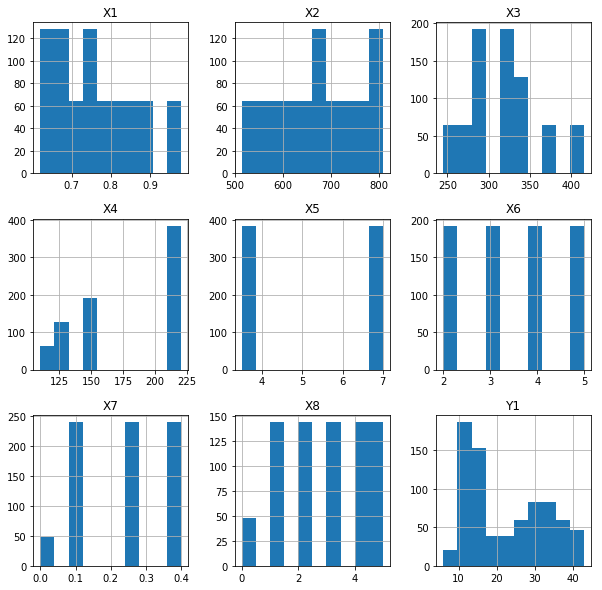

In [3]:
data.hist(figsize=(10,10))
plt.show()

## CLASSIFICATION
### Q 2.1:  Bucket values of 'y1' i.e 'Heating Load'  in the original dataset into 3 classes: 
### 0:'Low' ( < 15),  1:'Medium'  (15-30),    2: 'High'  (>30)   
### This converts the given dataset  into a classification problem, classes being *low, medium and high*.  
### Use this datset for creating a  logistic regression classifiction model for predicting heating load type of a building. Use test-train split ratio of 0.15
### Report training and test accuracies and  confusion matrices.


HINT: Use pandas.cut

In [4]:
#y1=data['Y1']
#y1=pd.cut(y1,[0,15,30],lower_infinite=True, upper_infinite=True)

data['Y1']=pd.cut(data['Y1'],[-np.inf,15,30,np.inf], 3,
           labels=["Low","Medium","High"])


In [5]:
print(data.head())

     X1     X2     X3      X4   X5  X6   X7  X8      Y1
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  Medium
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  Medium
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  Medium
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  Medium
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  Medium


In [6]:
X=data.iloc[:,:-1]
Y=data['Y1']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15, random_state=100)

print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 652
Number of samples in validation data: 116


In [7]:
from sklearn import linear_model

# Name our regression object
logreg_model = linear_model.LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.

print ('Training a logistic Regression Model..')
logreg_model.fit(x_train, y_train)

Training a logistic Regression Model..


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
training_accuracy=logreg_model.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)

Training Accuracy: 0.831288343558


In [9]:
#Alternatively 

# this line below will predict a category for every row in x_train
Z = logreg_model.predict(x_train) 


# Estimate errors in an array called L
def find_error(Y,Z):
    '''Y:actual_labels
    Z:predicted_labels'''
    
    L = np.arange(len(Y))
    for i,value in enumerate(Y):
        if value == Z[i]: 
            L[i] = 0
        else:
            L[i] = 1

    print ("Y-actual Z-predicted Error \n")
    for i,value in enumerate(Y):
        print (value, Z[i], L[i])
    error_rate=np.average(L)

    print ("\nThe error rate is ", error_rate)
    print ('\nThe accuracy of the model is ',1-error_rate )


In [10]:
find_error(y_train,Z)

Y-actual Z-predicted Error 

Low Low 0
High High 0
Low Low 0
High High 0
Low Low 0
Medium Medium 0
High High 0
Medium Low 1
Low Low 0
Medium Medium 0
High High 0
High High 0
Medium Medium 0
Low Low 0
Medium Medium 0
Low Low 0
Low Low 0
Low Low 0
Low Low 0
Medium Medium 0
Low Low 0
Low Low 0
Low Low 0
Medium Medium 0
Medium Medium 0
Medium High 1
Medium Medium 0
High High 0
Low Low 0
High High 0
Low Low 0
Medium Medium 0
High High 0
Medium Medium 0
Low Low 0
Medium High 1
Low Low 0
High High 0
Medium Low 1
High High 0
Low Low 0
Low Low 0
Medium Low 1
High High 0
Medium Medium 0
Medium Medium 0
Low Low 0
Medium Medium 0
High High 0
Low Low 0
Low Low 0
High High 0
Medium Medium 0
Low Low 0
Medium Medium 0
Low Low 0
Medium Low 1
Medium Medium 0
Medium Low 1
Low Low 0
High High 0
Low Low 0
Low Low 0
Medium Low 1
Low Low 0
Low Low 0
Low Low 0
Medium High 1
Low Low 0
Low Low 0
Low Low 0
High High 0
Medium Medium 0
Medium Medium 0
Medium High 1
High High 0
High High 0
Low Low 0
Low Low 0
Mediu

In [11]:
# VALIDATION ACCURACY: 
# we will find accuracy of the model 
# using data that was not used for training the model

validation_accuracy=logreg_model.score(x_test,y_test)
print('Accuraacy of the model on unseen validation data: ',validation_accuracy)

from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = logreg_model.predict(x_test)
cf=pd.DataFrame(confusion_matrix(y_true, y_pred),columns=['Pred 0',1,2],index=['Act 0',1,2])
print ('Confusion matrix of test data is: \n',cf)


Accuraacy of the model on unseen validation data:  0.836206896552
Confusion matrix of test data is: 
        Pred 0   1   2
Act 0      23   0   3
1           0  38   2
2           5   9  36


### Q2.2: One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. This makes training less sensitive to the scale of features . Scaling is important in algorithms that use distance based classification, SVM or K means or involve gradient descent optimization . 
### If we  Scale features in the range [0,1] it is called unity based normalization. Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.
refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [12]:
from sklearn import preprocessing

#X_scaled = preprocessing.scale(X)

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X_scaled,Y, test_size = 0.15, random_state=100)

In [13]:
logreg_model2 = linear_model.LogisticRegression(C=1e5)

print ('Training a logistic Regression Model..')
logreg_model2.fit(x_train2, y_train2)

Training a logistic Regression Model..


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [14]:
training_accuracy2=logreg_model2.score(x_train2,y_train2)
print ('Training Accuracy:',training_accuracy2)

Training Accuracy: 0.820552147239


In [15]:
validation_accuracy2=logreg_model2.score(x_test2,y_test2)
print('Accuraacy of the model on unseen validation data: ',validation_accuracy2)


y_true2 = y_test2
y_pred2 = logreg_model2.predict(x_test2)
cf2 = pd.DataFrame(confusion_matrix(y_true2, y_pred2),columns=['Pred 0',1,2],index=['Act 0',1,2])
print ('Confusion matrix of test data is: \n',cf2)


Accuraacy of the model on unseen validation data:  0.827586206897
Confusion matrix of test data is: 
        Pred 0   1   2
Act 0      22   0   4
1           0  35   5
2           5   6  39


##  REGRESSION
### Q 3.1: Using the data (Energy.csv) in its original format, train a linear regression model on 85 percent of the given dataset, what are the intercept  and coefficient values.



In [16]:
from sklearn import linear_model

data2 = pd.read_csv("Energy.csv")
X_reg = data.iloc[:,:-1] 
Y_reg = data2['Y1']

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,Y_reg, test_size = 0.15, random_state=100)

regr = linear_model.LinearRegression()

regr.fit(x_train_reg, y_train_reg)

Z_reg = regr.predict(x_train_reg)

In [17]:
# The coefficients
print('Coefficients:', regr.coef_)
print('\nIntercept:', regr.intercept_)

# The mean squared error
print("\nMean squared error:",np.mean((Z_reg - y_train_reg) ** 2))

Coefficients: [ -6.09999091e+01  -1.20592151e+11   1.20592151e+11   2.41184302e+11
   4.33188083e+00   1.88790945e-02   2.00671334e+01   2.35574595e-01]

Intercept: 75.751077454

Mean squared error: 8.57694489763039



## Q3.2: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
###   1. Data that was used for training(Training error)   
###  2. On the 15 percent of unseen data (test error)  



In [18]:
from sklearn.metrics import mean_squared_error

print("RMSE of training data: ", mean_squared_error(y_train_reg, Z_reg))

Z_test_reg = regr.predict(x_test_reg)
print("\nRMSE of test data: ", mean_squared_error(y_test_reg, Z_test_reg))


RMSE of training data:  8.57694489763

RMSE of test data:  8.27772712612



## Q4: Use varying data amounts  from your training data (100,200,300,400,500,all) to train models and report  training error and validation error.Plot error rates vs number of training examples.Do you see any relation.

#### Hint: Shuffle data, convert to arrays, use array indexing 

In [76]:
from sklearn.utils import shuffle
#example_df_3= shuffle(example_df).reset_index(drop=True)

data_Q4 = pd.read_csv("Energy.csv")
#X_reg = data.iloc[:,:-1] 
#Y_reg = data2['Y1']


In [50]:
#data_Q5 = shuffle(data_Q4).reset_index(drop=True)

#Datasets = pd.DataFrame()
#Datasets = np.zeros(shape=(6,2))

#data_shuff = shuffle(data_Q4).reset_index(drop=True)
#X_100 = data_shuff.iloc[:,:-1] 
#Y_100 = data_shuff['Y1']

#data_shuff = shuffle(data_Q4).reset_index(drop=True)
#X_200 = data_shuff.iloc[:,:-1] 
#Y_200 = data_shuff['Y1']

#data_shuff = shuffle(data_Q4).reset_index(drop=True)
#X_300 = data_shuff.iloc[:,:-1] 
#Y_300 = data_shuff['Y1']

#data_shuff = shuffle(data_Q4).reset_index(drop=True)
#X_400 = data_shuff.iloc[:,:-1] 
#Y_400 = data_shuff['Y1']

#data_shuff = shuffle(data_Q4).reset_index(drop=True)
#X_500 = data_shuff.iloc[:,:-1] 
#Y_500 = data_shuff['Y1']

#data_shuff = shuffle(data_Q4).reset_index(drop=True)
#X_All = data_shuff.iloc[:,:-1] 
#Y_All = data_shuff['Y1']

In [129]:
sample_size=[100,200,300,400,500,600]

sizes =[]
Train_errors = []
Valid_errors = []


for i in sample_size:
    
    data_shuff = shuffle(data_Q4).reset_index(drop=True)
    X_multi = data_shuff.iloc[:,:-1] 
    Y_multi = data_shuff['Y1'] 
    
    x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi,Y_multi, train_size = i, random_state=100)

    regr_multi = linear_model.LinearRegression()

    regr_multi.fit(x_train_multi, y_train_multi)

    Z_multi = regr_multi.predict(x_train_multi)

    print("\nTraining sample size: ",i)
    
    Train_E = mean_squared_error(y_train_multi, Z_multi)
    print("RMSE of training data: ", Train_E)

    Z_test_multi = regr_multi.predict(x_test_multi)
    Valid_E = mean_squared_error(y_test_multi, Z_test_multi)
    print("RMSE of test data: ", Valid_E)
    
    sizes.append(i)
    Train_errors.append(Train_E)
    Valid_errors.append(Valid_E)


Training sample size:  100
RMSE of training data:  8.04545539752
RMSE of test data:  8.97035930392

Training sample size:  200
RMSE of training data:  8.69798948875
RMSE of test data:  8.51932555744

Training sample size:  300
RMSE of training data:  7.59262086191
RMSE of test data:  9.6610884735

Training sample size:  400
RMSE of training data:  8.98016877558
RMSE of test data:  8.13676019414

Training sample size:  500
RMSE of training data:  8.19590334591
RMSE of test data:  9.20121569369

Training sample size:  600
RMSE of training data:  8.42102542349
RMSE of test data:  9.18679393948


C:\Anaconda\envs\Data-X\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [130]:
plt.plot(sizes, Train_errors,  color='red')
plt.plot(sizes, Valid_errors, color='blue',
         linewidth=3)

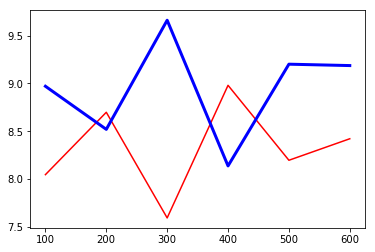

In [131]:
plt.show()